# Welcome to Python for Advanced Hydraulics!

### A Hands-On Introduction to Python and its Scientific Libraries

**Objective:** This notebook will guide you through the fundamental concepts of the Python programming language and introduce the core libraries we will use for data analysis, numerical modeling, and visualization in this course.

**How to use this notebook:**
1.  Read the text in the Markdown cells (like this one).
2.  Click on a code cell (the ones with `In [ ]:` next to them).
3.  Press **`Shift + Enter`** to run the code in that cell.
4.  Observe the output and try to understand what the code is doing. Feel free to experiment by changing the code and running it again!

--- 
## Part 1: Python Programming Fundamentals

Let's start with the building blocks of Python. We'll focus on the concepts most relevant to engineering and data analysis.

### 1.1 Variables and Data Types

A variable is a name you give to a storage location for data. You can store numbers, text, and other types of data.

- **`int`**: Integer (whole numbers)
- **`float`**: Floating-point number (numbers with decimals)
- **`str`**: String (text)
- **`bool`**: Boolean (`True` or `False`)

In [1]:
# Assigning values to variables
river_name = "Sunkoshi River"  # A string
flow_rate_m3s = 150.5         # A float (cubic meters per second)
manning_n = 0.035             # A float (Manning's roughness coefficient)
year = 2023                   # An integer
is_flood_stage = True         # A boolean

# The print() function displays the value of variables
print(river_name)
print(f"The flow rate is: {flow_rate_m3s} m^3/s") # An f-string is a modern way to format strings
print(f"Is the river in flood stage? {is_flood_stage}")

Sunkoshi River
The flow rate is: 150.5 m^3/s
Is the river in flood stage? True


### 1.2 Basic Arithmetic

Python can be used as a powerful calculator.

In [2]:
channel_width = 50  # meters
flow_depth = 3.2    # meters

# Calculate the cross-sectional area (for a rectangular channel)
area = channel_width * flow_depth

# Calculate the flow velocity (Q = V * A  => V = Q / A)
velocity = flow_rate_m3s / area

print(f"Cross-sectional area: {area:.2f} m^2") # .2f formats the float to 2 decimal places
print(f"Average velocity: {velocity:.2f} m/s")

Cross-sectional area: 160.00 m^2
Average velocity: 0.94 m/s


### 1.3 Data Structures: Lists and Dictionaries

**Lists** are ordered collections of items. They are perfect for storing time-series data, like daily rainfall measurements.

**Dictionaries** are unordered collections of `key: value` pairs. They are great for storing parameters or metadata.

In [3]:
# A list of daily rainfall measurements in mm
daily_rainfall_mm = [0.5, 1.2, 10.8, 5.3, 0.0, 0.2, 3.5]

# Access elements by their index (starts at 0)
print(f"Rainfall on day 1: {daily_rainfall_mm[0]} mm")
print(f"Rainfall on day 3: {daily_rainfall_mm[2]} mm")

# A dictionary for storing model parameters
channel_params = {
    "name": "Main Canal",
    "shape": "trapezoidal",
    "manning_n": 0.022,
    "bottom_width": 10.0 # meters
}

# Access values by their key
print(f"The Manning's n for the {channel_params['name']} is {channel_params['manning_n']}")

Rainfall on day 1: 0.5 mm
Rainfall on day 3: 10.8 mm
The Manning's n for the Main Canal is 0.022


### 1.4 Control Flow: `if` statements and `for` loops

Control flow allows you to execute code conditionally (`if`) or repeatedly (`for`).

Let's use an `if/elif/else` block to classify flow based on the **Froude Number** (`Fr = V / sqrt(g*D)`), where `D` is hydraulic depth.

In [4]:
import math # We need the math library for the square root function

g = 9.81 # acceleration due to gravity
hydraulic_depth = area / channel_width # For a rectangular channel, D = y

froude_number = velocity / math.sqrt(g * hydraulic_depth)

print(f"Calculated Froude Number: {froude_number:.3f}")

if froude_number < 1.0:
    print("Flow regime is: Subcritical")
elif froude_number == 1.0:
    print("Flow regime is: Critical")
else:
    print("Flow regime is: Supercritical")

Calculated Froude Number: 0.168
Flow regime is: Subcritical


Now, let's use a `for` loop to process our `daily_rainfall_mm` list.

In [5]:
total_rainfall = 0
rainy_days = 0

# Loop through each value in the list
for rainfall in daily_rainfall_mm:
    print(f"Processing measurement: {rainfall} mm")
    total_rainfall += rainfall # Add the current value to the total
    if rainfall > 0:
        rainy_days += 1

print("\n--- Results ---") # \n creates a new line
print(f"Total rainfall over the period: {total_rainfall:.2f} mm")
print(f"Number of rainy days: {rainy_days}")

Processing measurement: 0.5 mm
Processing measurement: 1.2 mm
Processing measurement: 10.8 mm
Processing measurement: 5.3 mm
Processing measurement: 0.0 mm
Processing measurement: 0.2 mm
Processing measurement: 3.5 mm

--- Results ---
Total rainfall over the period: 21.50 mm
Number of rainy days: 6


### 1.5 Functions

Functions are reusable blocks of code that perform a specific task. They are essential for writing clean, organized, and non-repetitive code.

Let's create a function to calculate velocity using **Manning's Equation**: `V = (1/n) * R_h^(2/3) * S^(1/2)`

In [6]:
def calculate_manning_velocity(n, hydraulic_radius, channel_slope):
    """Calculates flow velocity using the Manning's equation.
    
    Args:
        n (float): Manning's roughness coefficient.
        hydraulic_radius (float): Hydraulic radius (Rh) in meters.
        channel_slope (float): The bed slope of the channel (dimensionless).
        
    Returns:
        float: The calculated velocity in m/s.
    """
    velocity = (1.0 / n) * (hydraulic_radius**(2/3)) * (channel_slope**0.5)
    return velocity

# Now let's use our function!
rh = 2.5  # meters
s0 = 0.001 # A gentle slope

v_manning = calculate_manning_velocity(n=manning_n, hydraulic_radius=rh, channel_slope=s0)

print(f"Velocity calculated with Manning's equation: {v_manning:.3f} m/s")

Velocity calculated with Manning's equation: 1.664 m/s


### 1.6 An Introduction to Classes (Object-Oriented Programming)

Classes are the core of **Object-Oriented Programming (OOP)**. Think of a class as a **blueprint** for creating objects. An object bundles together data (called **attributes**) and functions that operate on that data (called **methods**).

**Why is this useful for hydraulics?**
Instead of having separate variables for a channel's width, slope, and roughness, we can create a single `Channel` object that holds all of this information. This makes our code more organized, reusable, and intuitive.

Let's create a blueprint for a trapezoidal open channel.

In [7]:
import math

class TrapezoidalChannel:
    """A blueprint for representing a trapezoidal open channel."""

    # The __init__ method is the constructor. It runs when we create a new object.
    def __init__(self, bottom_width, side_slope, manning_n, bed_slope):
        # 'self' refers to the specific object instance being created.
        # These are the object's attributes (its data).
        self.bottom_width = bottom_width # b
        self.side_slope = side_slope     # z (as in 1V:zH)
        self.manning_n = manning_n       # n
        self.bed_slope = bed_slope       # S0
        print(f"Created a new channel with bottom width {self.bottom_width} m.")

    # These are the object's methods (its behaviors).
    def calculate_area(self, flow_depth):
        """Calculates the cross-sectional area for a given flow depth."""
        return (self.bottom_width + self.side_slope * flow_depth) * flow_depth

    def calculate_wetted_perimeter(self, flow_depth):
        """Calculates the wetted perimeter for a given flow depth."""
        wetted_side = flow_depth * math.sqrt(1 + self.side_slope**2)
        return self.bottom_width + 2 * wetted_side
    
    def calculate_hydraulic_radius(self, flow_depth):
        """Calculates the hydraulic radius (A/P)."""
        area = self.calculate_area(flow_depth)
        perimeter = self.calculate_wetted_perimeter(flow_depth)
        return area / perimeter
    
    def __repr__(self):
        """Provides a nice string representation of the object."""
        return f"TrapezoidalChannel(b={self.bottom_width}, z={self.side_slope}, n={self.manning_n})"

Now that we have our `TrapezoidalChannel` blueprint, we can create actual channel **objects** (also called **instances**).

In [8]:
# Create an instance of our channel class
main_canal = TrapezoidalChannel(bottom_width=10, side_slope=2, manning_n=0.014, bed_slope=0.0005)

# Create a second, different channel from the same blueprint
drainage_ditch = TrapezoidalChannel(bottom_width=2, side_slope=3, manning_n=0.030, bed_slope=0.001)

# The __repr__ method gives us a clean printout
print("\n--- Our Channel Objects ---")
print(f"Main Canal: {main_canal}")
print(f"Drainage Ditch: {drainage_ditch}")

# Now, let's use the methods on the 'main_canal' object
current_flow_depth = 2.5 # meters

area = main_canal.calculate_area(current_flow_depth)
rh = main_canal.calculate_hydraulic_radius(current_flow_depth)

print("\n--- Calculations for Main Canal at 2.5m depth ---")
print(f"Cross-sectional Area (A): {area:.3f} m^2")
print(f"Hydraulic Radius (Rh): {rh:.3f} m")

Created a new channel with bottom width 10 m.
Created a new channel with bottom width 2 m.

--- Our Channel Objects ---
Main Canal: TrapezoidalChannel(b=10, z=2, n=0.014)
Drainage Ditch: TrapezoidalChannel(b=2, z=3, n=0.03)

--- Calculations for Main Canal at 2.5m depth ---
Cross-sectional Area (A): 37.500 m^2
Hydraulic Radius (Rh): 1.771 m


--- 
## Part 2: Introduction to Key Scientific Libraries

Now that we have a grasp of basic Python, let's see why it's so powerful for scientific computing. The power comes from its ecosystem of specialized libraries.

First, we import them, often with standard abbreviations (`np` for NumPy, `pd` for Pandas, etc.).

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sympy as sp

print("All libraries imported successfully!")

All libraries imported successfully!


### 2.1 NumPy: Numerical Python

**What it's for:** The fundamental package for numerical computation. Its main feature is the powerful N-dimensional array object (`ndarray`).

**Why we use it:** NumPy arrays are much faster and more memory-efficient than Python lists for numerical operations. They allow you to perform mathematical operations on entire arrays at once (called "vectorization").

In [11]:
# A Python list
list_of_depths = [1.2, 1.5, 1.8, 2.1]

# A NumPy array
np_array_of_depths = np.array(list_of_depths)

print(f"Original NumPy array: {np_array_of_depths}")

# Let's say we want to add 0.5m of freeboard to all depths.
# With a list, we'd need a loop. With NumPy, it's simple:
depths_with_freeboard = np_array_of_depths + 0.5

print(f"Depths with freeboard: {depths_with_freeboard}")

# We can also create arrays from scratch. E.g., a time array from 0 to 10 seconds with 5 steps.
time_steps = np.linspace(0, 10, 5)
print(f"Time steps array: {time_steps}")

Original NumPy array: [1.2 1.5 1.8 2.1]
Depths with freeboard: [1.7 2.  2.3 2.6]
Time steps array: [ 0.   2.5  5.   7.5 10. ]


### 2.2 Pandas: Python Data Analysis Library

**What it's for:** High-performance, easy-to-use data structures and data analysis tools. Its primary objects are the `Series` (1D) and the `DataFrame` (2D, like a spreadsheet).

**Why we use it:** It's the standard for reading, writing, cleaning, filtering, and analyzing tabular data (e.g., from CSV or Excel files).

In [12]:
# Let's create some sample data representing daily streamflow
data = {
    'date': pd.to_datetime(['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05']),
    'flow_m3s': [95.2, 110.5, 155.8, 142.1, 120.7],
    'turbidity_NTU': [12.3, 15.6, 25.1, 22.0, 18.5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the date as the index (the primary label for rows)
df.set_index('date', inplace=True)

print("Our Streamflow DataFrame:")
print(df)

print("\n--- Basic Stats ---")
print(df.describe()) # Get quick summary statistics

print("\n--- Peak Flow ---")
print(df['flow_m3s'].max()) # Get the maximum value in a column

Our Streamflow DataFrame:
            flow_m3s  turbidity_NTU
date                               
2023-10-01      95.2           12.3
2023-10-02     110.5           15.6
2023-10-03     155.8           25.1
2023-10-04     142.1           22.0
2023-10-05     120.7           18.5

--- Basic Stats ---
         flow_m3s  turbidity_NTU
count    5.000000       5.000000
mean   124.860000      18.700000
std     24.278241       5.061126
min     95.200000      12.300000
25%    110.500000      15.600000
50%    120.700000      18.500000
75%    142.100000      22.000000
max    155.800000      25.100000

--- Peak Flow ---
155.8


### 2.3 Matplotlib: The Plotting Library

**What it's for:** Creating static, animated, and interactive visualizations.

**Why we use it:** A picture is worth a thousand data points! We use it to create plots, graphs, and figures to understand our data and communicate our results. It integrates perfectly with Pandas.

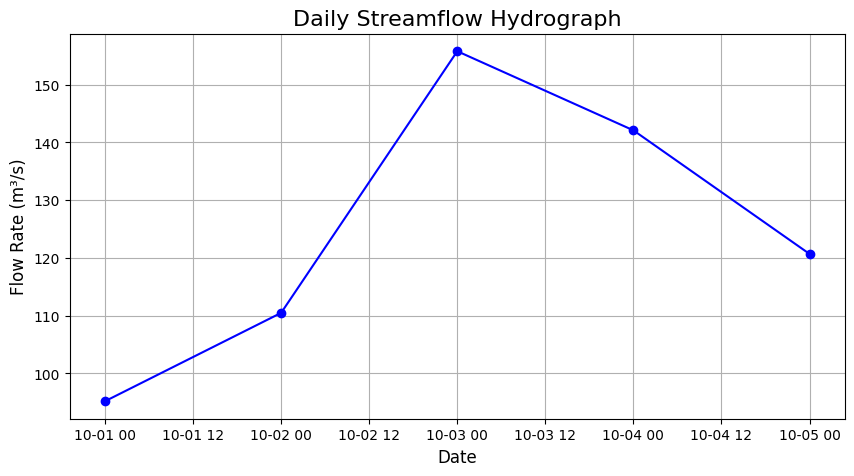

In [13]:
# Let's plot the streamflow data from our Pandas DataFrame
plt.figure(figsize=(10, 5)) # Create a figure of a specific size

plt.plot(df.index, df['flow_m3s'], marker='o', linestyle='-', color='b')

# Add labels and a title for a professional-looking plot
plt.title('Daily Streamflow Hydrograph', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Flow Rate (m³/s)', fontsize=12)
plt.grid(True) # Add a grid for better readability
plt.show() # Display the plot

### 2.4 SciPy: Scientific Python

**What it's for:** Building on NumPy, SciPy provides a large collection of algorithms for optimization, integration, interpolation, statistics, and more.

**Why we use it:** When we need to solve complex numerical problems, like fitting a curve to data, solving differential equations (e.g., for unsteady flow), or performing statistical tests.

Fitted Parameters: a=79.97, b=1.48, H0=1.43


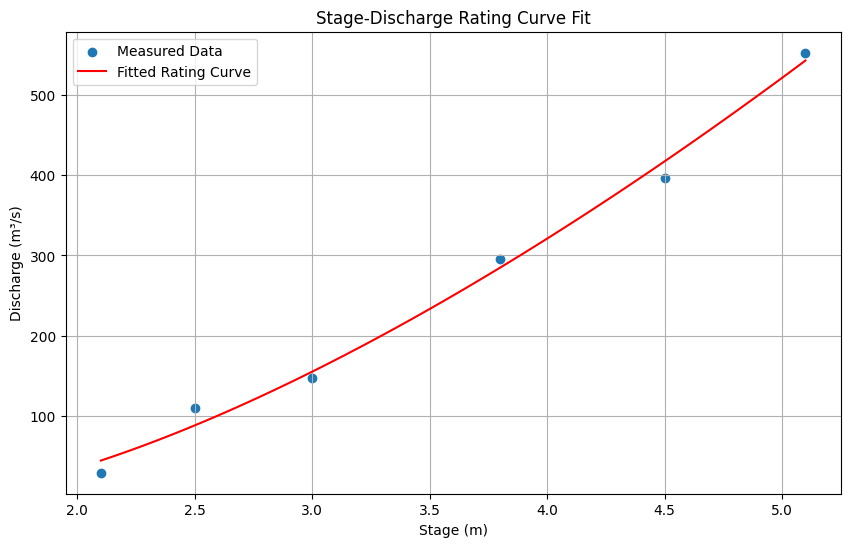

In [14]:
# Example: Curve fitting. Let's fit a rating curve (flow vs. stage) to some noisy data.

# Stage-discharge relationship often follows a power law: Q = a * (H - H0)^b
def rating_curve(H, a, b, H0):
    return a * (H - H0)**b

# Generate some synthetic, noisy data
stage_data = np.array([2.1, 2.5, 3.0, 3.8, 4.5, 5.1])
flow_data = np.array([50, 90, 150, 280, 410, 550]) + np.random.normal(0, 15, 6)

# Use scipy.optimize.curve_fit to find the best parameters a, b, H0
params, covariance = opt.curve_fit(rating_curve, stage_data, flow_data, p0=[100, 1.5, 1.0])

a_fit, b_fit, H0_fit = params
print(f"Fitted Parameters: a={a_fit:.2f}, b={b_fit:.2f}, H0={H0_fit:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(stage_data, flow_data, label='Measured Data') # The original data
stage_smooth = np.linspace(stage_data.min(), stage_data.max(), 100)
plt.plot(stage_smooth, rating_curve(stage_smooth, *params), 'r-', label='Fitted Rating Curve')
plt.title('Stage-Discharge Rating Curve Fit')
plt.xlabel('Stage (m)')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid(True)
plt.show()

### 2.5 SymPy: Symbolic Mathematics

**What it's for:** Performing symbolic mathematics (algebra).

**Why we use it:** Unlike NumPy which works with numbers, SymPy works with symbols. It's like a computer algebra system (CAS) that can solve equations, differentiate, integrate, and simplify expressions, which is incredibly useful for deriving formulas before you start coding the numerical solution.

In [15]:
# Let's use SymPy to symbolically rearrange the Manning's equation to solve for Slope (S)
import sympy as sp

# Define all variables as symbolic objects
V, n, Rh, s0 = sp.symbols('V n R_h s_0')

# Define the Manning's equation
manning_eq = sp.Eq(V, (1/n) * Rh**sp.Rational(2,3) * s0**sp.Rational(1,2))

print("Original Manning's Equation:")
display(manning_eq) # display() renders equations nicely in Jupyter

# Solve the equation for the symbol S
slope_solution = sp.solve(manning_eq, s0)

print("\nEquation solved for s0:")
display(sp.Eq(s0, slope_solution[0]))

Original Manning's Equation:


Eq(V, R_h**(2/3)*sqrt(s_0)/n)


Equation solved for s0:


Eq(s_0, V**2*n**2/R_h**(4/3))

--- 
## Congratulations!

We have completed this introductory tour of Python and its core scientific libraries. We have learned how to:

-   Write basic Python code using variables, lists, loops, and functions.
-   Use **NumPy** for efficient numerical calculations on arrays.
-   Use **Pandas** to load, inspect, and analyze tabular data.
-   Use **Matplotlib** to create meaningful plots from your data.
-   Use **SciPy** for advanced numerical tasks like curve fitting.
-   Use **SymPy** for symbolic manipulation of hydraulic equations.

This foundation is everything you need to start tackling the more complex problems we will encounter in Advanced Hydraulics.